In [1]:
#from pandas import read_csv
from pandas import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-1-2dd3da127f31>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Importing Dataset and cleaning them

In [2]:
#read in NAV dataset
NAV = pd.read_csv('../dataset/final_NAV.csv', parse_dates=['quarter'])

In [3]:
NAV.drop(columns = ['Unnamed: 0'], inplace=True)

In [4]:
NAV.rename(columns={'quarter': 'Date'}, inplace=True)

In [5]:
NAV.set_index('Date', inplace = True)

In [6]:
NAV.head()

,final NAV
Date,
2017-03-31,1.000000e+06
2017-06-30,3.460997e+06
2017-09-30,9.237187e+05
2017-12-31,2.006649e+06
2018-03-31,5.893689e+06


In [7]:
NAV.dtypes

final NAV    float64
dtype: object

In [8]:
# S&P 500 import and resample it quarter
SP = pd.read_csv('../dataset/s_and_p.csv', parse_dates=['Date'], index_col = 'Date')

In [9]:
SP.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
SP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,2364.820068,2370.350098,2362.600098,2362.719971,2362.719971,3354110000
2017-04-03,2362.340088,2365.870117,2344.729980,2358.840088,2358.840088,3416400000
2017-04-04,2354.760010,2360.530029,2350.719971,2360.159912,2360.159912,3206240000
2017-04-05,2366.590088,2378.360107,2350.520020,2352.949951,2352.949951,3770520000
2017-04-06,2353.790039,2364.159912,2348.899902,2357.489990,2357.489990,3201920000


In [11]:
Quarterly_resampled_data = SP.Close.resample('Q').mean() 
Quarterly_resampled_data
Q = pd.DataFrame(Quarterly_resampled_data)
Q['percentage'] = Q['Close'].pct_change()
Q.fillna(value = 0, inplace=True)

In [12]:
Q.head()

,Close,percentage
Date,,
2017-03-31,2362.719971,0.000000
2017-06-30,2397.970936,0.014920
2017-09-30,2467.174626,0.028859
2017-12-31,2603.277317,0.055165
2018-03-31,2733.476723,0.050014


In [13]:
profit_percentage = list (Q['percentage'])
NAV_end = [1000000]
NAV_end[0]

1000000

In [14]:
i = 1
for i in profit_percentage:
    print (i)
    j = 0
    print(j)
    period_NAV = NAV_end[j]*(1+i)
    NAV_end.append(period_NAV)
    
    j=j+1


0.0
0
0.014919654064686982
0
0.028859270052686847
0
0.05516540609515852
0
0.05001365208884878
0
-0.011101421741803508
0
0.05418537717929639
0
-0.05287567641320445
0
0.008180136883460642
0
0.059288160301491866
0
0.026197104649567038
0
0.04223330421986127
0
-0.008721556599585067
0
-0.040637743914149094
0
0.13216401856366167
0


In [15]:
NAV_end.pop(0)

1000000

In [16]:
NAV_end

[1000000.0,
 1014919.654064687,
 1028859.2700526868,
 1055165.4060951585,
 1050013.6520888489,
 988898.5782581965,
 1054185.3771792965,
 947124.3235867956,
 1008180.1368834607,
 1059288.1603014919,
 1026197.104649567,
 1042233.3042198613,
 991278.4434004149,
 959362.2560858509,
 1132164.0185636617]

In [17]:
Q['S&P final NAV'] = NAV_end

In [18]:
Q

,Close,percentage,S&P final NAV
Date,,,
2017-03-31,2362.719971,0.000000,1.000000e+06
2017-06-30,2397.970936,0.014920,1.014920e+06
2017-09-30,2467.174626,0.028859,1.028859e+06
2017-12-31,2603.277317,0.055165,1.055165e+06
2018-03-31,2733.476723,0.050014,1.050014e+06
2018-06-30,2703.131245,-0.011101,9.888986e+05
2018-09-30,2849.601431,0.054185,1.054185e+06
2018-12-31,2698.926828,-0.052876,9.471243e+05
2019-03-31,2721.004418,0.008180,1.008180e+06


In [19]:
#create a new dataframe called df and fill it in with the 2 graphs
df = pd.DataFrame(NAV['final NAV'])
df.head()

,final NAV
Date,
2017-03-31,1.000000e+06
2017-06-30,3.460997e+06
2017-09-30,9.237187e+05
2017-12-31,2.006649e+06
2018-03-31,5.893689e+06


In [20]:
df['S&P final NAV'] = Q['S&P final NAV']
df

,final NAV,S&P final NAV
Date,,
2017-03-31,1.000000e+06,1.000000e+06
2017-06-30,3.460997e+06,1.014920e+06
2017-09-30,9.237187e+05,1.028859e+06
2017-12-31,2.006649e+06,1.055165e+06
2018-03-31,5.893689e+06,1.050014e+06
2018-06-30,4.714505e+06,9.888986e+05
2018-09-30,3.825094e+05,1.054185e+06
2018-12-31,5.889524e+04,9.471243e+05
2019-03-31,2.365030e+06,1.008180e+06


# Cumulative returns 

<AxesSubplot:xlabel='Date'>

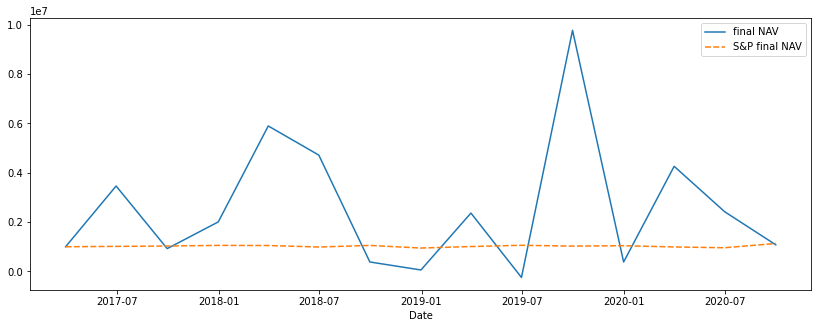

In [21]:
#plot the graph
fig = plt.figure(figsize=(14,5))
sns.lineplot(data = df)

In [22]:
# let us zoom in on the final year
df2 = df[10:]

In [23]:
df2

,final NAV,S&P final NAV
Date,,
2019-09-30,9.768358e+06,1.026197e+06
2019-12-31,3.816194e+05,1.042233e+06
2020-03-31,4.259105e+06,9.912784e+05
2020-06-30,2.418544e+06,9.593623e+05
2020-09-30,1.078788e+06,1.132164e+06


<AxesSubplot:xlabel='Date'>

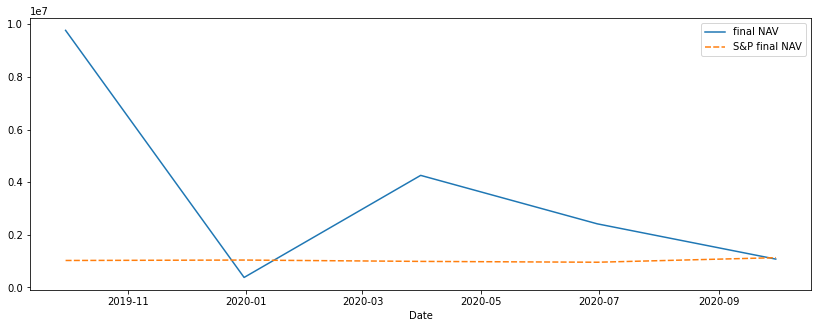

In [24]:
#plot the final year
fig = plt.figure(figsize=(14,5))
sns.lineplot(data = df2)

# Rolling sharpe ratio

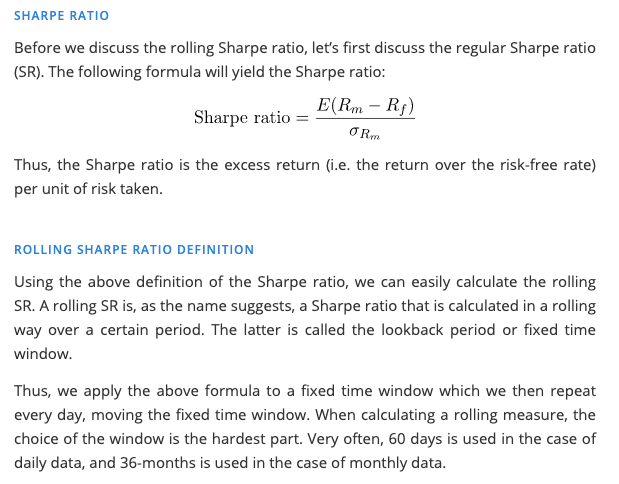

In [25]:
from IPython.display import Image
Image(filename='../pictures/sharpe_ratio.png')
# sharpe ratio explained

### create a new dataframe

In [26]:
Q.head()

,Close,percentage,S&P final NAV
Date,,,
2017-03-31,2362.719971,0.000000,1.000000e+06
2017-06-30,2397.970936,0.014920,1.014920e+06
2017-09-30,2467.174626,0.028859,1.028859e+06
2017-12-31,2603.277317,0.055165,1.055165e+06
2018-03-31,2733.476723,0.050014,1.050014e+06


In [27]:
df_returns = pd.DataFrame(Q['percentage'])
df_returns.head()
# initiate a new dataframe called df_returns

,percentage
Date,
2017-03-31,0.000000
2017-06-30,0.014920
2017-09-30,0.028859
2017-12-31,0.055165
2018-03-31,0.050014


In [28]:
df_returns.rename(columns =  {'percentage':'S&P % returns'}, inplace=True)
#rename it

In [29]:
#read in 
temp = pd.read_csv('../dataset/Final_by_quarter.csv')
temp.head()

,Quarter,Pos. Open,Pos. Close,Profit
0,2017-06-30,567.349,573.744,2.460997
1,2017-09-30,85.689,86.468,-0.076281
2,2017-12-31,732.537,737.739,1.006649
3,2018-03-31,1832.113,1934.712,4.893689
4,2018-06-30,1642.219,1655.285,3.714505


In [30]:
profit_percent = list(temp['Profit'])
profit_percent.insert(0,0)

In [31]:
df_returns

,S&P % returns
Date,
2017-03-31,0.000000
2017-06-30,0.014920
2017-09-30,0.028859
2017-12-31,0.055165
2018-03-31,0.050014
2018-06-30,-0.011101
2018-09-30,0.054185
2018-12-31,-0.052876
2019-03-31,0.008180


In [32]:
df_returns['strategy % returns'] = profit_percent
df_returns

,S&P % returns,strategy % returns
Date,,
2017-03-31,0.000000,0.000000
2017-06-30,0.014920,2.460997
2017-09-30,0.028859,-0.076281
2017-12-31,0.055165,1.006649
2018-03-31,0.050014,4.893689
2018-06-30,-0.011101,3.714505
2018-09-30,0.054185,-0.617491
2018-12-31,-0.052876,-0.941105
2019-03-31,0.008180,1.365030


In [33]:
def my_rolling_sharpe(y):
    return np.sqrt(4) * (y.mean() / y.std()) # we roll over 6 months
# create a rolling sharpe ratio

In [34]:
df_rs = df_returns

In [35]:
# To calculate the Sharpe ratio for a window exactly 6 calendar months wide
df_rs['S&P 500 6 months rolling sharpe'] = [my_rolling_sharpe(df_rs.loc[d - pd.offsets.DateOffset(months=6):d, 'S&P % returns']) 
             for d in df.index]
df_rs['Strategy 6 months rolling sharpe'] = [my_rolling_sharpe(df_rs.loc[d - pd.offsets.DateOffset(months=6):d, 'strategy % returns']) 
             for d in df.index]


<AxesSubplot:xlabel='Date'>

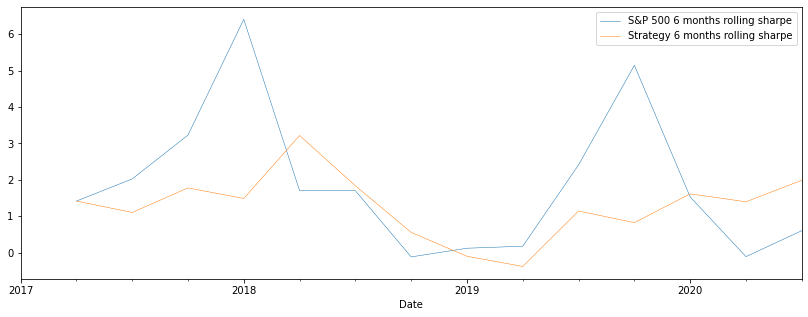

In [36]:
# Compare the two windows
df_rs.plot(y=['S&P 500 6 months rolling sharpe','Strategy 6 months rolling sharpe'], linewidth=0.5, figsize=(14,5))


In [37]:
df_rs

,S&P % returns,strategy % returns,S&P 500 6 months rolling sharpe,Strategy 6 months rolling sharpe
Date,,,,
2017-03-31,0.000000,0.000000,NaN,NaN
2017-06-30,0.014920,2.460997,1.414214,1.414214
2017-09-30,0.028859,-0.076281,2.022251,1.101448
2017-12-31,0.055165,1.006649,3.227608,1.775823
2018-03-31,0.050014,4.893689,6.409921,1.485632
2018-06-30,-0.011101,3.714505,1.701434,3.216222
2018-09-30,0.054185,-0.617491,1.698150,1.835675
2018-12-31,-0.052876,-0.941105,-0.120977,0.552895
2019-03-31,0.008180,1.365030,0.117799,-0.103354


In [38]:
df_rs['S&P 500 6 months rolling sharpe'].mean()

1.872315811299582

In [39]:
df_rs['Strategy 6 months rolling sharpe'].mean()
#average rolling sharpe ratio is lower for my strategy than the S&P

1.2750698757795085